In [38]:
import os
current_path = os.getcwd()
folder = "MA"
path =  folder.join(current_path.split(folder)[:-1])+folder
os.chdir(path)

In [39]:
import numpy as np
import pandas as pd
import statistics
from Scenarios.scenario_types.BaseScenario import BaseScenario
from Repair.Robust_PCA.robust_PCA_estimator import Robust_PCA_estimator   
from sklearn.decomposition import PCA


from matplotlib import pyplot as plt

plt.rcParams.update({

    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [40]:
scen = BaseScenario("YAHOO.csv" ,data_columns = [1,2,3,4,5])

['theisplots\\IMR.eps', 'outputfile_2', 'run.py', 'bayesiancomp', 'thesisplots', 'ParameterTuning', '.gitignore', 'myfile.txt', 'IMR.eps', 'IMR.pgf', 'run_ressources', 'Scenarios', '.git', 'data_methods', 'varanomsizeampBayesianOptimization.svg', 'A_questions', 'myfile.toml', '__pycache__', 'Injection', '.idea', 'Repair', 'searchresults.csv', 'install.sh', 'play.py', 'IMR.svg', 'Data', 'play2.py', 'error_ranking.py']
Data/YAHOO.csv
           TS17        TS24         TS3         TS31         TS38
0    216.370595 -150.575963  -19.413646   394.123324   483.204696
1      0.762393  100.794326   61.443260   -43.032020   -64.519211
2    339.998476  -88.801713   85.501344   528.987760   624.097423
3    386.066099  552.919332  216.338428   567.962720   659.731059
4    294.997672  303.475326  232.313775   357.743117   390.140876
..          ...         ...         ...          ...          ...
667  394.099501  234.967815  239.788574   918.725564  1325.773780
668  466.968961  137.366274  179.389

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:438: UserWarning: X has feature names, but Robust_PCA_estimator was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:438: UserWarning: X has feature names, but Robust_PCA_estimator was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:438: UserWarning: X has feature names, but Robust_PCA_estimator was fitted without feature names
  warnings.warn(


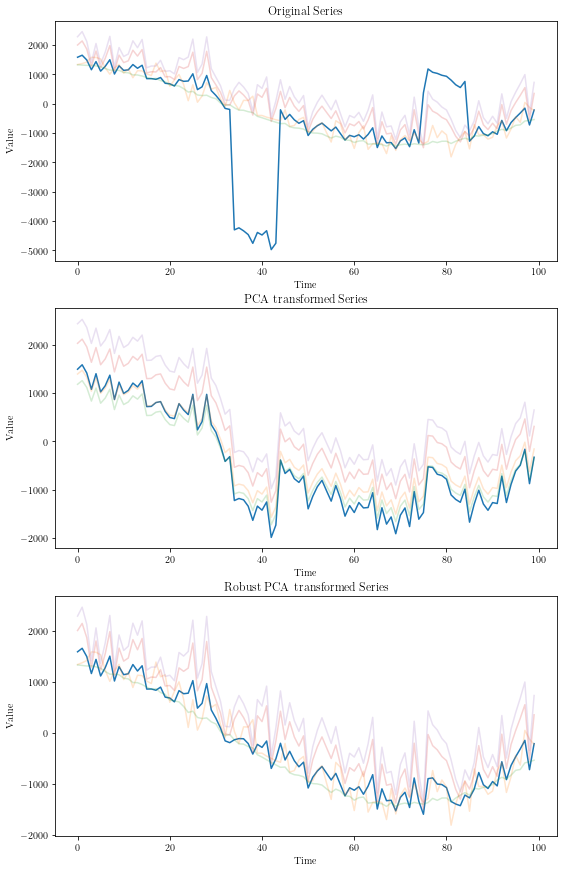

In [58]:
cut = 100
n_components = 1
injected = scen.i_get_scenario(0)["injected"]
estim = Robust_PCA_estimator(n_components=n_components)

estim.fit(injected)
predicted = pd.DataFrame(estim.predict(injected))
pca = PCA(n_components=n_components) 


transformed = pca.fit_transform(injected)
pca_predicted = pd.DataFrame(pca.inverse_transform(transformed))

f, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(9, 15))

for name,col in injected.iloc[:cut,:].iteritems():
    ax1.plot(np.array(col),alpha=0.2 if name != injected.columns[0] else 1)

ax1.set_title("Original Series")
ax1.set_xlabel("Time", fontsize=10)
ax1.set_ylabel("Value", fontsize=10)

for name,col in pca_predicted.iloc[:cut,:].iteritems():
    ax2.plot(np.array(col),alpha=0.2 if name != pca_predicted.columns[0] else 1)
ax2.set_title("PCA transformed Series")
ax2.set_xlabel("Time", fontsize=10)
ax2.set_ylabel("Value", fontsize=10)


for name,col in predicted.iloc[:cut,:].iteritems():
    ax3.plot(np.array(col),alpha=0.2 if name != predicted.columns[0] else 1)
ax3.set_title("Robust PCA transformed Series")
ax3.set_xlabel("Time", fontsize=10)
ax3.set_ylabel("Value", fontsize=10)
plt.show()    